In [1]:
install.packages("MASS")
library("MASS")
install.packages("missMDA")
library("missMDA")
install.packages("tidyverse")
library("tidyverse")
install.packages("caret")
library("caret")

Installing package into 'C:/Users/2198K/Documents/R/win-library/3.6'
(as 'lib' is unspecified)




  There is a binary version available but the source version is later:
       binary   source needs_compilation
MASS 7.3-51.5 7.3-51.6              TRUE

  Binaries will be installed
package 'MASS' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'MASS'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\2198K\Documents\R\win-library\3.6\00LOCK\MASS\libs\x64\MASS.dll to C:\Users\2198K\Documents\R\win-library\3.6\MASS\libs\x64\MASS.dll: Permission denied"
Warning message:
"restored 'MASS'"



The downloaded binary packages are in
	C:\Users\2198K\AppData\Local\Temp\RtmpauPhcs\downloaded_packages


Installing package into 'C:/Users/2198K/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'missMDA' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\2198K\AppData\Local\Temp\RtmpauPhcs\downloaded_packages


Installing package into 'C:/Users/2198K/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'tidyverse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\2198K\AppData\Local\Temp\RtmpauPhcs\downloaded_packages


-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.2.1     v purrr   0.3.3
v tibble  2.1.3     v dplyr   0.8.4
v tidyr   1.0.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
x dplyr::select() masks MASS::select()

Installing package into 'C:/Users/2198K/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'caret' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'caret'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\2198K\Documents\R\win-library\3.6\00LOCK\caret\libs\x64\caret.dll to C:\Users\2198K\Documents\R\win-library\3.6\caret\libs\x64\caret.dll: Permission denied"
Warning message:
"restored 'caret'"



The downloaded binary packages are in
	C:\Users\2198K\AppData\Local\Temp\RtmpauPhcs\downloaded_packages


Loading required package: lattice


Attaching package: 'caret'


The following object is masked from 'package:purrr':

    lift




In [2]:
ionomics <- read.csv('New_ionStats.csv',colClasses =c("NULL","NULL",NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,
                                                                    NA,NA,NA,NA,NA,NA,NA))
ionomics <- imputePCA(ionomics, method = "Regularized")

In [3]:
# Split the data into training (80%) and test set (20%)
set.seed(123)
training.samples <- ionomics$completeObs[,2] %>%
  createDataPartition(p = 0.8, list = FALSE)
train.data <- ionomics$completeObs[training.samples, ]
test.data <- ionomics$completeObs[-training.samples, ]
train.data <- unlist(test.data)
test.data <- unlist(test.data)
train.data <- as.data.frame(train.data)
test.data <- as.data.frame(test.data)

In [4]:
# Fit the model
model <- lda(Spec_int~., data = train.data)
# Make predictions
predictions <- model %>% predict(test.data)
# Model accuracy
mean(predictions$class==test.data$Spec_int)
model

[1] 0.9756098

Call:
lda(Spec_int ~ ., data = train.data)

Prior probabilities of groups:
         1          2          3          4          6          7          8 
0.03658537 0.02439024 0.09756098 0.06097561 0.14634146 0.07317073 0.01219512 
         9 
0.54878049 

Group means:
         B11         Na23       Mg26        Al27         P31        S34
1  1.2654346  0.628462377 -0.7298818 -0.15824870  0.15873035  0.4553207
2  0.6224360  0.870009816  0.1637802 -0.07227465  1.34705800  1.4730770
3  1.1501877  1.560495566  0.5173016  0.40350927  1.99861996  1.8524296
4  0.5879879  0.284809660  0.4715818 -0.00970125  0.94701934  0.8964740
6  1.1186853  0.435989766 -1.1421121 -0.12961366  0.53600859  0.8841790
7  0.7792849 -0.008727842 -0.2770220 -0.11076915  0.76545626  0.5504412
8  0.3200617  0.320312800 -1.0476761  0.08140163  0.05124661  1.0835806
9 -0.8254546 -0.526656220  0.4803133 -0.15746892 -0.76938705 -0.7118292
         K39       Ca44       Fe54       Mn55        Co59        Ni60
1 -0.1364458 

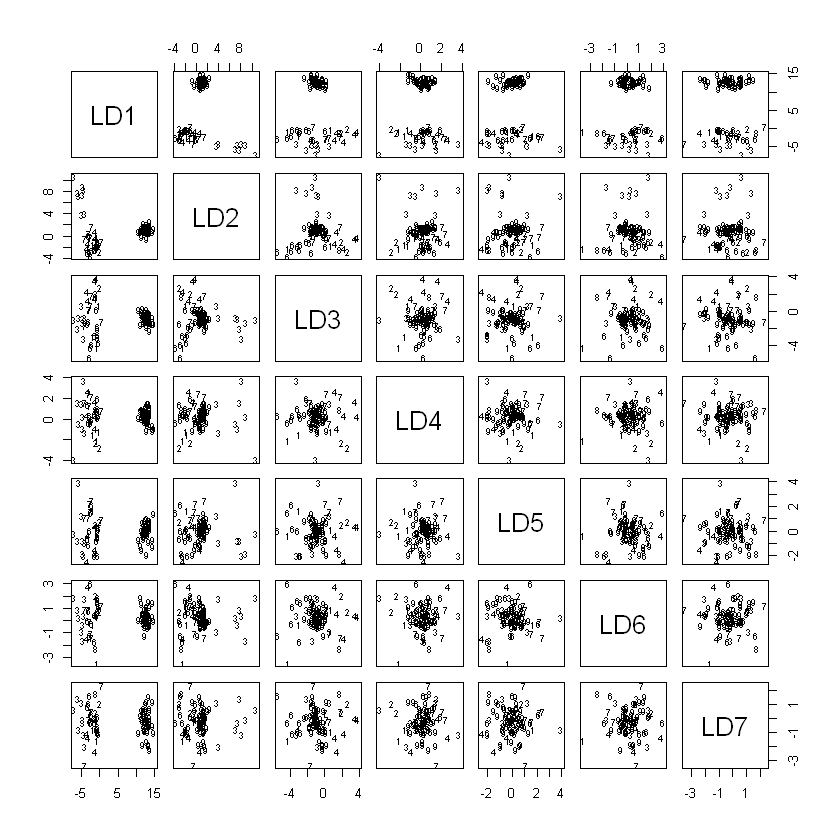

In [5]:
plot(model)

In [6]:
# Predicted classes
head(predictions$class, 6)
# Predicted probabilities of class memebership.
head(predictions$posterior, 6) 
# Linear discriminants
head(predictions$x, 3) 

[1] 1 2 1 2 2 3
Levels: 1 2 3 4 6 7 8 9

,1,2,3,4,6,7,8,9
1,8.660530e-01,2.780898e-08,5.529508e-21,8.405863e-09,1.335305e-01,4.164654e-04,1.126929e-11,2.462894e-50
2,9.984845e-02,6.347119e-01,1.243487e-22,2.042663e-01,4.653515e-02,1.462308e-02,1.511173e-05,5.674258e-39
3,9.994287e-01,2.000817e-14,3.004003e-28,6.766431e-14,5.712700e-04,5.152563e-10,1.790633e-11,1.218165e-47
4,9.659379e-07,9.981001e-01,4.089180e-22,1.860983e-03,7.310091e-07,3.721687e-05,5.511954e-09,6.168388e-47
5,1.337028e-07,9.999916e-01,9.358218e-33,8.008054e-06,3.127285e-09,2.277441e-08,2.193360e-07,4.137124e-44
6,2.670657e-23,2.728595e-27,1.000000e+00,1.055884e-19,1.061368e-22,8.337425e-16,1.295096e-29,8.092816e-75


,LD1,LD2,LD3,LD4,LD5,LD6,LD7
1,-7.881449,-2.452022,-2.121092,-1.771958,1.62476168,-0.6548339,-0.6138287
2,-6.345819,-2.645294,1.481254,-1.509078,0.05582749,0.5998606,-0.7194455
3,-6.796615,-3.164009,-3.424467,-2.378990,-0.40287741,-3.8178325,-1.4071885


In [7]:
predmodel.test.lda = predict(model, data=test.data)
table(Predicted=predmodel.test.lda$class, Species=test.data$Spec_int)

         Species
Predicted  1  2  3  4  6  7  8  9
        1  2  0  0  0  0  0  0  0
        2  1  2  0  0  0  0  0  0
        3  0  0  8  0  0  0  0  0
        4  0  0  0  5  0  0  0  0
        6  0  0  0  0 12  1  0  0
        7  0  0  0  0  0  5  0  0
        8  0  0  0  0  0  0  1  0
        9  0  0  0  0  0  0  0 45